In [1]:
import random

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


from sklearn.cluster import KMeans
from sklearn import datasets
import scipy.cluster.hierarchy as hac

# import seaborn as sb


In [2]:
def init_board_gauss(N, k):
    n = float(N)/k
    X = []
    for i in range(k):
        c = (random.uniform(-1, 1), random.uniform(-1, 1))
        s = random.uniform(0.05,0.5)
        x = []
        while len(x) < n:
            a, b = np.array([np.random.normal(c[0], s), np.random.normal(c[1], s)])
            # Continue drawing points from the distribution in the range [-1,1]
            if abs(a) < 1 and abs(b) < 1:
                x.append([a,b])
        X.extend(x)
    X = np.array(X)[:N]
    return X

def init_board(N):
    X = np.array([(random.uniform(-1, 1), random.uniform(-1, 1)) for i in range(N)])
    return X

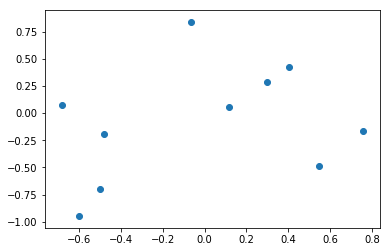

In [3]:
x_norm = init_board(10)
plt.scatter(x_norm[:, 0], x_norm[:, 1])


In [3]:
tester_norm=KMeans(n_clusters=3)
tester_norm.fit(x_norm)
labels_norm = tester_norm.labels_
plt.scatter(x_norm[:, 0], x_norm[:, 1], c=labels_norm.astype(np.float))

NameError: name 'x_norm' is not defined

In [ ]:
print tester_norm.labels_

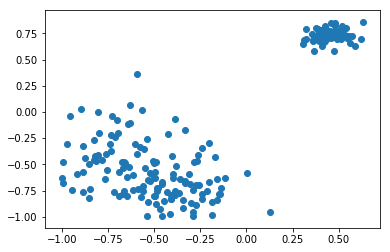

In [6]:
x_gauss = init_board_gauss(N=200, k=3)
plt.scatter(x_gauss[:, 0], x_gauss[:, 1])


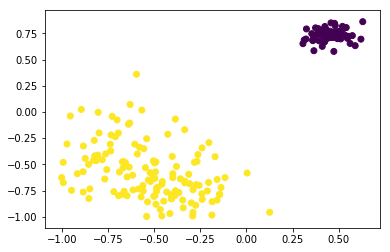

In [13]:

tester_gauss=KMeans(n_clusters=2)
tester_gauss.fit(x_gauss)
labels_gauss = tester_gauss.labels_
plt.scatter(x_gauss[:, 0], x_gauss[:, 1], c=labels_gauss.astype(np.float))

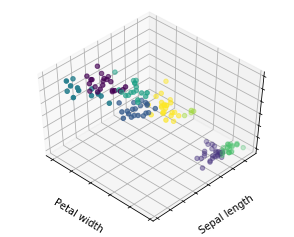

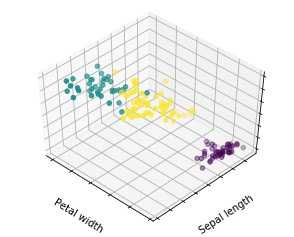

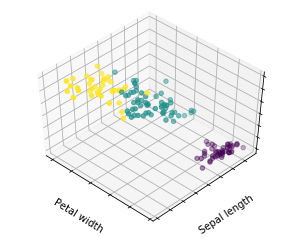

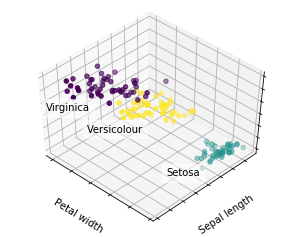

In [21]:
#process example
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause


np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8),
              'k_means_iris_bad_init': KMeans(n_clusters=3, n_init=1,
                                              init='random')}


fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float))

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
plt.show()





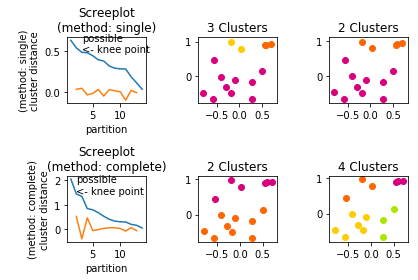

In [30]:
#Hierachal example
import numpy as np
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt


# a = np.array([[0.1,   2.5],
#               [1.5,   .4 ],
#               [0.3,   1  ],
#               [1  ,   .8 ],
#               [0.5,   0  ],
#               [0  ,   0.5],
#               [0.5,   0.5],
#               [2.7,   2  ],
#               [2.2,   3.1],
#               [3  ,   2  ],
#               [3.2,   1.3]])

a = init_board(15)
fig, axes23 = plt.subplots(2, 3)

for method, axes in zip(['single', 'complete'], axes23):
    z = hac.linkage(a, method=method)

    # Plotting
    axes[0].plot(range(1, len(z)+1), z[::-1, 2])
    knee = np.diff(z[::-1, 2], 2)
    axes[0].plot(range(2, len(z)), knee)

    num_clust1 = knee.argmax() + 2
    knee[knee.argmax()] = 0
    num_clust2 = knee.argmax() + 2

    axes[0].text(num_clust1, z[::-1, 2][num_clust1-1], 'possible\n<- knee point')

    part1 = hac.fcluster(z, num_clust1, 'maxclust')
    part2 = hac.fcluster(z, num_clust2, 'maxclust')

    
    clr = ['#2200CC' ,'#D9007E' ,'#FF6600' ,'#FFCC00' ,'#ACE600' ,'#0099CC' ,
    '#8900CC' ,'#FF0000' ,'#FF9900' ,'#FFFF00' ,'#00CC01' ,'#0055CC']

    for part, ax in zip([part1, part2], axes[1:]):
        for cluster in set(part):
            ax.scatter(a[part == cluster, 0], a[part == cluster, 1], 
                       color=clr[cluster])

    m = '\n(method: {})'.format(method)
    plt.setp(axes[0], title='Screeplot{}'.format(m), xlabel='partition',
             ylabel='{}\ncluster distance'.format(m))
    plt.setp(axes[1], title='{} Clusters'.format(num_clust1))
    plt.setp(axes[2], title='{} Clusters'.format(num_clust2))

plt.tight_layout()
plt.show()